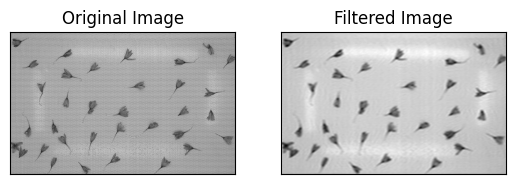

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
# read the image
# convert the image to grayscale
img=cv2.imread('saffrun.jpg',0)
# perform FFT(fourier transform) on the image
f= np.fft.fft2(img)
shiftedfourier= np.fft.fftshift(f)
row,columns= img.shape
centerx=row//2
centery = columns//2
# create a mask to block the low-frequency regions
mask = np.zeros(img.shape,np.uint8)
mask[centerx-40:centerx+60, centery-40: centery+60] = 1
# apply the mask to the shifted FFT image
result = shiftedfourier * mask
# shift the zero-frequency component back to the top-left corner of the spectrum
reverseshifted= np.fft.ifftshift(result)
# perform Inverse FFT to obtain the filtered image
reversefourier= np.fft.ifft2(reverseshifted)
realreverse= np.abs(reversefourier)
# convert the output to 8-bit unsigned integer format
resultimage_8bit= cv2.convertScaleAbs(realreverse)

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(resultimage_8bit, cmap='gray'), plt.title('Filtered Image')
# print(np.max(img_back))
plt.xticks([]), plt.yticks([])
plt.show()

# img = cv2.imread('saffrun.jpg')

# # convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # perform FFT on the image
# f = np.fft.fft2(gray)
# fshift = np.fft.fftshift(f)

# # create a mask to block the low-frequency regions
# rows, cols = gray.shape
# crow, ccol = rows // 2, cols // 2
# mask = np.zeros((rows, cols), np.uint8)
# mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# # apply the mask to the shifted FFT image
# fshift_filtered = fshift * mask

# # shift the zero-frequency component back to the top-left corner of the spectrum
# f_ishift = np.fft.ifftshift(fshift_filtered)

# # perform Inverse FFT to obtain the filtered image
# img_back = np.fft.ifft2(f_ishift)
# img_back = np.abs(img_back)

# # convert the output to 8-bit unsigned integer format
# img_back = cv2.convertScaleAbs(img_back)

# # display the original and filtered images
# plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122), plt.imshow(img_back, cmap='gray'), plt.title('Filtered Image')
# # print(np.max(img_back))
# plt.xticks([]), plt.yticks([])
# plt.show()


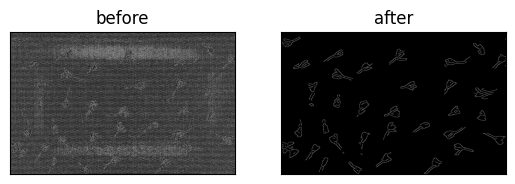

In [39]:

plt.subplot(121)
plt.title('before'), plt.xticks([]), plt.yticks([])
plt.imshow(cv2.Canny(img,100,400,apertureSize=5),cmap='gray')
plt.subplot(122)
plt.title('after'), plt.xticks([]), plt.yticks([])
plt.imshow(cv2.Canny(resultimage_8bit,100,400,apertureSize=5),cmap='gray')
plt.show()

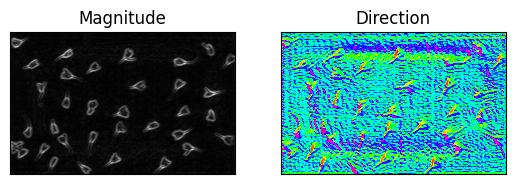

In [40]:
gx = cv2.Sobel(resultimage_8bit, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(resultimage_8bit, cv2.CV_32F, 0, 1, ksize=1)
mag = np.sqrt(gx**2 + gy**2)
angle = np.arctan2(gy, gx)
# mag, ang = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)
plt.subplot(121), plt.imshow(mag, cmap='gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(angle, cmap='hsv')
plt.title('Direction'), plt.xticks([]), plt.yticks([])
plt.show()